In [874]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [875]:
data = pd.read_csv('problem_2_train.csv')

In [876]:
data.describe()

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days
count,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,2.946134e+06,11.732000,340546.139840,232.654400,231.495360,155.040480,366009.473440,4457.158080,12.730400
std,7.733480e+04,9.141463,213449.097822,30.471658,22.521945,41.883918,210990.167946,200.945634,5.075533
min,2.818359e+06,0.000000,0.000000,0.000000,0.000000,131.000000,0.000000,4008.000000,2.000000
25%,2.877226e+06,3.000000,110018.000000,233.000000,233.000000,131.000000,135034.000000,4398.000000,9.000000
50%,2.944426e+06,8.000000,400001.000000,233.000000,233.000000,131.000000,395001.500000,4474.000000,12.000000
75%,3.012237e+06,21.000000,500004.000000,233.000000,233.000000,131.000000,560016.000000,4580.000000,15.000000
max,3.101035e+06,27.000000,800001.000000,308.000000,245.000000,228.000000,855107.000000,5146.000000,57.000000


In [877]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 16 columns):
srno                   6250 non-null int64
mobmake                6250 non-null object
hubid                  6250 non-null int64
hubpincode             6250 non-null int64
pickuppartnerid        6250 non-null int64
deliverypartnerid      6250 non-null int64
insuranceCompanyId     6250 non-null int64
custpincodecategory    6250 non-null object
claimtype              6250 non-null object
custpincode            6250 non-null int64
memcreateddate         6250 non-null object
mobilepurchasedate     6250 non-null object
claimintdate           6250 non-null object
servicecntrid          6250 non-null int64
pickupStartdate        6250 non-null object
tat_in_days            6250 non-null int64
dtypes: int64(9), object(7)
memory usage: 781.3+ KB


In [878]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [879]:
data['mobmake'].unique()

array(['AN', 'AJ', 'AM', 'C', 'AI', 'AD', 'S', 'AA', 'Y', 'AE', 'D', 'U',
       'AB', 'T', 'AF', 'G', 'L', 'H', 'K', 'J', 'N', 'AP', 'AK', 'O',
       'F', 'AL', 'R', 'M', 'Z', 'P', 'I', 'V', 'AR', 'W', 'AG', 'B', 'A',
       'AO'], dtype=object)

In [880]:
data['claimtype'].unique()

array(['ADLD', 'EW'], dtype=object)

In [881]:
def get_claimtype(x):
    if x == 'ADLD':
        return 1
    else:
        return 0

In [882]:
data['cat_claim'] = [get_claimtype(data['claimtype'][i]) for i in range(len(data['claimtype']))]

In [883]:
data.drop(['srno', 'claimtype'], inplace = True, axis = 1)

In [884]:
data.head()

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,cat_claim
0,AN,7,500004,233,233,131,A,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5,1
1,AJ,10,226010,233,233,131,A,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12,1
2,AJ,2,110018,233,233,228,A,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9,1
3,AM,2,110018,233,233,228,B,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9,1
4,AN,21,110015,233,233,131,A,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8,1


In [885]:
data['custpincodecategory'].unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [886]:
def cat_custpincodecategory(x):
    if x == '0':
        return 0
    elif x == 'A':
        return 1
    elif x == 'B':
        return 2
    elif x == 'C':
        return 3
    elif x == 'D':
        return 4

In [887]:
data['cat_custpincodecategory'] = [cat_custpincodecategory(data['custpincodecategory'][i]) for i in range(len(data['custpincodecategory']))]
data.drop(['custpincodecategory'], inplace=True, axis = 1)

In [888]:
data.head()

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,cat_claim,cat_custpincodecategory
0,AN,7,500004,233,233,131,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5,1,1
1,AJ,10,226010,233,233,131,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12,1,1
2,AJ,2,110018,233,233,228,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9,1,1
3,AM,2,110018,233,233,228,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9,1,2
4,AN,21,110015,233,233,131,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8,1,1


In [889]:
m1 = np.array(data['mobmake'])
m1 = list(set(m1))

In [890]:
d = {}
for i in range(len(m1)):
    d[m1[i]] = i

In [891]:
data['cat_mobmake'] = [d[data['mobmake'][i]] for i in range(len(data['mobmake']))]
data.drop(['mobmake'], inplace = True, axis= 1)
data.head()

,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,cat_claim,cat_custpincodecategory,cat_mobmake
0,7,500004,233,233,131,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5,1,1,19
1,10,226010,233,233,131,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12,1,1,11
2,2,110018,233,233,228,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9,1,1,11
3,2,110018,233,233,228,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9,1,2,5
4,21,110015,233,233,131,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8,1,1,19


In [892]:
type(data['mobilepurchasedate'][0])

str

In [893]:
data['mobpurdate_year'] = [int(data['mobilepurchasedate'][i].split('-')[0]) for i in range(len(data['mobilepurchasedate']))]
data['memcreateddate_year'] = [int(data['memcreateddate'][i].split('-')[0]) for i in range(len(data['memcreateddate']))]
data['claimintdate_year'] = [int(data['claimintdate'][i].split('-')[0]) for i in range(len(data['claimintdate']))]
data['pickupstartdate_year'] = [int(data['pickupStartdate'][i].split('-')[0]) for i in range(len(data['pickupStartdate']))]

In [894]:
data['mobpurdate_date'] = [int(data['mobilepurchasedate'][i].split('-')[2]) for i in range(len(data['mobilepurchasedate']))]
data['memcreateddate_date'] = [int(data['memcreateddate'][i].split('-')[2]) for i in range(len(data['memcreateddate']))]
data['claimintdate_date'] = [int(data['claimintdate'][i].split('-')[2]) for i in range(len(data['claimintdate']))]
data['pickupstartdate_date'] = [int(data['pickupStartdate'][i].split('-')[2]) for i in range(len(data['pickupStartdate']))]

In [895]:
data['mobpurdate_month'] = [int(data['mobilepurchasedate'][i].split('-')[1]) for i in range(len(data['mobilepurchasedate']))]
data['memcreateddate_month'] = [int(data['memcreateddate'][i].split('-')[1]) for i in range(len(data['memcreateddate']))]
data['claimintdate_month'] = [int(data['claimintdate'][i].split('-')[1]) for i in range(len(data['claimintdate']))]
data['pickupstartdate_month'] = [int(data['pickupStartdate'][i].split('-')[1]) for i in range(len(data['pickupStartdate']))]

In [896]:
data.drop(['mobilepurchasedate', 'memcreateddate','claimintdate','pickupStartdate'], axis = 1, inplace=True)

In [897]:
data.columns

Index(['hubid', 'hubpincode', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincode', 'servicecntrid', 'tat_in_days',
       'cat_claim', 'cat_custpincodecategory', 'cat_mobmake',
       'mobpurdate_year', 'memcreateddate_year', 'claimintdate_year',
       'pickupstartdate_year', 'mobpurdate_date', 'memcreateddate_date',
       'claimintdate_date', 'pickupstartdate_date', 'mobpurdate_month',
       'memcreateddate_month', 'claimintdate_month', 'pickupstartdate_month'],
      dtype='object')

In [898]:
# remove any one of hubid or hubpincode since they convey the same info
data.drop('hubpincode', inplace = True, axis  =1)

In [899]:
data.head()

,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,cat_claim,cat_custpincodecategory,cat_mobmake,...,claimintdate_year,pickupstartdate_year,mobpurdate_date,memcreateddate_date,claimintdate_date,pickupstartdate_date,mobpurdate_month,memcreateddate_month,claimintdate_month,pickupstartdate_month
0,7,233,233,131,500001,4403,5,1,1,19,...,2018,2018,2,27,8,13,12,4,2,2
1,10,233,233,131,226022,4444,12,1,1,11,...,2018,2018,5,6,4,8,3,3,2,2
2,2,233,233,228,110018,4388,9,1,1,11,...,2018,2018,27,1,3,12,1,2,2,2
3,2,233,233,228,124001,4092,9,1,2,5,...,2018,2018,31,17,4,14,1,1,2,2
4,21,233,233,131,201301,4580,8,1,1,19,...,2018,2018,20,23,9,14,1,1,2,2


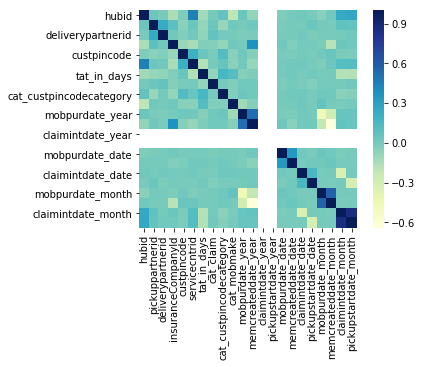

In [900]:
cor = data.corr()
sns.heatmap(cor, square = True, cmap = 'YlGnBu')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [901]:
# remove claimintdate_year and pickupStartdate_year columns since they have no correlation to tat

In [902]:
data.drop(['claimintdate_year','pickupstartdate_year'], inplace = True, axis = 1)

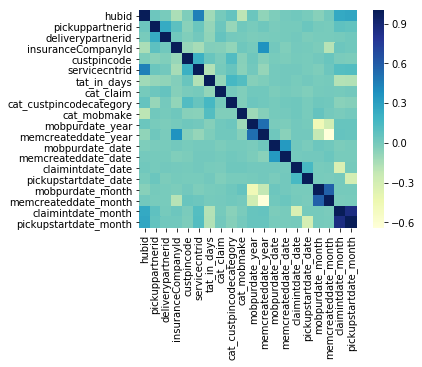

In [903]:
cor = data.corr()
sns.heatmap(cor, square = True, cmap = 'YlGnBu')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [904]:
# remove columns whose correlation with tat is around 0

In [905]:
data.drop(['memcreateddate_month','mobpurdate_month','pickupstartdate_date','claimintdate_date','memcreateddate_date','mobpurdate_date','memcreateddate_year','mobpurdate_year'], axis= 1, inplace = True)

In [906]:
data.head()

,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,cat_claim,cat_custpincodecategory,cat_mobmake,claimintdate_month,pickupstartdate_month
0,7,233,233,131,500001,4403,5,1,1,19,2,2
1,10,233,233,131,226022,4444,12,1,1,11,2,2
2,2,233,233,228,110018,4388,9,1,1,11,2,2
3,2,233,233,228,124001,4092,9,1,2,5,2,2
4,21,233,233,131,201301,4580,8,1,1,19,2,2


In [907]:
data.columns

Index(['hubid', 'pickuppartnerid', 'deliverypartnerid', 'insuranceCompanyId',
       'custpincode', 'servicecntrid', 'tat_in_days', 'cat_claim',
       'cat_custpincodecategory', 'cat_mobmake', 'claimintdate_month',
       'pickupstartdate_month'],
      dtype='object')

TRY 1

In [908]:
data2 = data

In [909]:
X = data2.iloc[:,[0,1,2,3,4,5,7,8,9,10,11]].values
y = data2.iloc[:,6].values

In [910]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4687, 11), (1563, 11), (4687,), (1563,))

In [911]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [912]:
def regression_rmse(X_train, X_test, y_train, y_test):
    lin = LinearRegression() 
    lin.fit(X_train, y_train) 
    y_pred1 = lin.predict(X_test)
    print("LINEAR REGRESSION : ")
    print("  TEST SET ERROR : ",rmse(y_pred1, y_test))
    print("  TRAINING SET ERROR : ", rmse(lin.predict(X_train), y_train))
     
    poly = PolynomialFeatures(degree = 2) 
    X_poly = poly.fit_transform(X_train) 
    poly.fit(X_poly, y_train) 
    lin2 = LinearRegression() 
    lin2.fit(X_poly, y_train) 
    y_pred2 = lin2.predict(poly.fit_transform(X_test))
    print("POLYNOMIAL REGRESSION WITH DEGREE 2 : ")
    print("  TEST SET ERROR : ",rmse(y_pred2, y_test))
    #print("  TRAINING SET ERROR : ", rmse(lin2.predict(X_train), y_train))
    
    poly = PolynomialFeatures(degree = 3) 
    X_poly = poly.fit_transform(X_train) 
    poly.fit(X_poly, y_train) 
    lin3 = LinearRegression() 
    lin3.fit(X_poly, y_train) 
    y_pred3 = lin3.predict(poly.fit_transform(X_test))
    print("POLYNOMIAL REGRESSION WITH DEGREE 3 : ")
    print("  TEST SET ERROR : ",rmse(y_pred3, y_test))
    #print("  TRAINING SET ERROR : ", rmse(lin3.predict(X_train), y_train))
    
    for i in range(1,15):
        dt = DecisionTreeRegressor(random_state = 0, max_depth =i)
        dt.fit(X_train, y_train)
        y_pred4 = dt.predict(X_test)
        print(i, "  DECISION TREE REGRESSION  : ", rmse(y_pred4, y_test))
        print("  DECISION TREE TRAINING SET ERROR : ", rmse(dt.predict(X_train), y_train))
        accuracies1 = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
        print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracies1.mean(), accuracies1.std() * 2))

In [913]:
regression_rmse(X_train, X_test, y_train, y_test)

LINEAR REGRESSION : 
  TEST SET ERROR :  4.864449937577911
  TRAINING SET ERROR :  4.7606343596606004
POLYNOMIAL REGRESSION WITH DEGREE 2 : 
  TEST SET ERROR :  4.6957370203760505
POLYNOMIAL REGRESSION WITH DEGREE 3 : 
  TEST SET ERROR :  4.875476132672365
1   DECISION TREE REGRESSION  :  5.049427880556843
  DECISION TREE TRAINING SET ERROR :  4.914430696817897
Cross Validation Accuracy: 0.02 (+/- 0.05)
2   DECISION TREE REGRESSION  :  4.931385213226845
  DECISION TREE TRAINING SET ERROR :  4.783241407511831
Cross Validation Accuracy: 0.07 (+/- 0.08)
3   DECISION TREE REGRESSION  :  4.818261760948854
  DECISION TREE TRAINING SET ERROR :  4.635090878247159
Cross Validation Accuracy: 0.12 (+/- 0.08)
4   DECISION TREE REGRESSION  :  4.653739649286562
  DECISION TREE TRAINING SET ERROR :  4.474781518528367
Cross Validation Accuracy: 0.17 (+/- 0.08)
5   DECISION TREE REGRESSION  :  4.579593562181838
  DECISION TREE TRAINING SET ERROR :  4.319124096943415
Cross Validation Accuracy: 0.20 (+/-

TRY 2

In [914]:
data3 = data

In [915]:
data3.head()

,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,cat_claim,cat_custpincodecategory,cat_mobmake,claimintdate_month,pickupstartdate_month
0,7,233,233,131,500001,4403,5,1,1,19,2,2
1,10,233,233,131,226022,4444,12,1,1,11,2,2
2,2,233,233,228,110018,4388,9,1,1,11,2,2
3,2,233,233,228,124001,4092,9,1,2,5,2,2
4,21,233,233,131,201301,4580,8,1,1,19,2,2


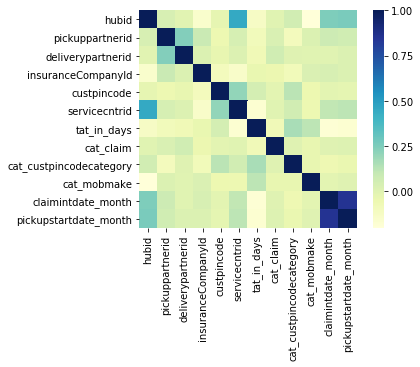

In [916]:
cor = data3.corr()
sns.heatmap(cor, square = True, cmap = 'YlGnBu')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [917]:
data3.drop(['pickuppartnerid','insuranceCompanyId'], inplace  =True, axis=1)

In [918]:
data3.head()

,hubid,deliverypartnerid,custpincode,servicecntrid,tat_in_days,cat_claim,cat_custpincodecategory,cat_mobmake,claimintdate_month,pickupstartdate_month
0,7,233,500001,4403,5,1,1,19,2,2
1,10,233,226022,4444,12,1,1,11,2,2
2,2,233,110018,4388,9,1,1,11,2,2
3,2,233,124001,4092,9,1,2,5,2,2
4,21,233,201301,4580,8,1,1,19,2,2


In [919]:
data3.columns

Index(['hubid', 'deliverypartnerid', 'custpincode', 'servicecntrid',
       'tat_in_days', 'cat_claim', 'cat_custpincodecategory', 'cat_mobmake',
       'claimintdate_month', 'pickupstartdate_month'],
      dtype='object')

In [920]:
X2 = data3.iloc[:,[0,1,2,3,5,6,7,8,9]].values
y2 = data3.iloc[:,4].values

In [921]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4687, 9), (1563, 9), (4687,), (1563,))

In [922]:
regression_rmse(X_train, X_test, y_train, y_test)

LINEAR REGRESSION : 
  TEST SET ERROR :  4.872856420805224
  TRAINING SET ERROR :  4.766132793190765
POLYNOMIAL REGRESSION WITH DEGREE 2 : 
  TEST SET ERROR :  4.695653845763959
POLYNOMIAL REGRESSION WITH DEGREE 3 : 
  TEST SET ERROR :  4.621367580109453
1   DECISION TREE REGRESSION  :  5.049427880556843
  DECISION TREE TRAINING SET ERROR :  4.914430696817897
Cross Validation Accuracy: 0.02 (+/- 0.05)
2   DECISION TREE REGRESSION  :  4.931385213226845
  DECISION TREE TRAINING SET ERROR :  4.783241407511831
Cross Validation Accuracy: 0.07 (+/- 0.08)
3   DECISION TREE REGRESSION  :  4.818261760948854
  DECISION TREE TRAINING SET ERROR :  4.635090878247159
Cross Validation Accuracy: 0.12 (+/- 0.08)
4   DECISION TREE REGRESSION  :  4.653739649286562
  DECISION TREE TRAINING SET ERROR :  4.474781518528367
Cross Validation Accuracy: 0.17 (+/- 0.09)
5   DECISION TREE REGRESSION  :  4.574872341231527
  DECISION TREE TRAINING SET ERROR :  4.319548663853832
Cross Validation Accuracy: 0.21 (+/- 0

TRY 3

In [923]:
data4 = data

In [924]:
data4.head()

,hubid,deliverypartnerid,custpincode,servicecntrid,tat_in_days,cat_claim,cat_custpincodecategory,cat_mobmake,claimintdate_month,pickupstartdate_month
0,7,233,500001,4403,5,1,1,19,2,2
1,10,233,226022,4444,12,1,1,11,2,2
2,2,233,110018,4388,9,1,1,11,2,2
3,2,233,124001,4092,9,1,2,5,2,2
4,21,233,201301,4580,8,1,1,19,2,2


In [925]:
data4.drop(['hubid','deliverypartnerid'], inplace =True, axis = 1)

In [926]:
data4.head()

,custpincode,servicecntrid,tat_in_days,cat_claim,cat_custpincodecategory,cat_mobmake,claimintdate_month,pickupstartdate_month
0,500001,4403,5,1,1,19,2,2
1,226022,4444,12,1,1,11,2,2
2,110018,4388,9,1,1,11,2,2
3,124001,4092,9,1,2,5,2,2
4,201301,4580,8,1,1,19,2,2


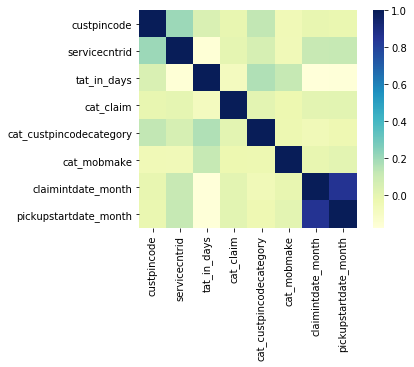

In [927]:
cor = data4.corr()
sns.heatmap(cor, square = True, cmap = 'YlGnBu')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [928]:
X3 = data4.iloc[:,[0,1,3,4,5,6,7]].values
y3 = data4.iloc[:,2].values

In [929]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.25, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4687, 7), (1563, 7), (4687,), (1563,))

In [930]:
regression_rmse(X_train, X_test, y_train, y_test)

LINEAR REGRESSION : 
  TEST SET ERROR :  5.0422705303674
  TRAINING SET ERROR :  4.722391531676693
POLYNOMIAL REGRESSION WITH DEGREE 2 : 
  TEST SET ERROR :  5.100721611682038
POLYNOMIAL REGRESSION WITH DEGREE 3 : 
  TEST SET ERROR :  4.737004041643878
1   DECISION TREE REGRESSION  :  5.177018440869705
  DECISION TREE TRAINING SET ERROR :  4.87020284770607
Cross Validation Accuracy: 0.04 (+/- 0.03)
2   DECISION TREE REGRESSION  :  5.043333599135412
  DECISION TREE TRAINING SET ERROR :  4.743829777638773
Cross Validation Accuracy: 0.07 (+/- 0.07)
3   DECISION TREE REGRESSION  :  4.941484346291614
  DECISION TREE TRAINING SET ERROR :  4.596883055937756
Cross Validation Accuracy: 0.12 (+/- 0.08)
4   DECISION TREE REGRESSION  :  4.763441247836423
  DECISION TREE TRAINING SET ERROR :  4.446331344208888
Cross Validation Accuracy: 0.17 (+/- 0.10)
5   DECISION TREE REGRESSION  :  4.621126786586789
  DECISION TREE TRAINING SET ERROR :  4.306812905368544
Cross Validation Accuracy: 0.21 (+/- 0.11

CLEANING THE TESTING DATA

In [832]:
data.columns

Index(['hubid', 'pickuppartnerid', 'deliverypartnerid', 'insuranceCompanyId',
       'custpincode', 'servicecntrid', 'tat_in_days', 'cat_claim',
       'cat_custpincodecategory', 'cat_mobmake', 'claimintdate_month',
       'pickupstartdate_month'],
      dtype='object')

In [833]:
test_data = pd.read_csv('problem_2_test.csv')

In [834]:
test_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate'],
      dtype='object')

In [835]:
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [836]:
test_data['cat_claim'] = [get_claimtype(test_data['claimtype'][i]) for i in range(len(test_data['claimtype']))]

In [837]:
test_data.drop(['srno', 'claimtype'], inplace = True, axis = 1)

In [838]:
test_data['cat_custpincodecategory'] = [cat_custpincodecategory(test_data['custpincodecategory'][i]) for i in range(len(test_data['custpincodecategory']))]
test_data.drop(['custpincodecategory'], inplace=True, axis = 1)

In [839]:
test_data.head()

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,cat_claim,cat_custpincodecategory
0,AN,3,560011,233,233,131,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06,1,1
1,AJ,2,110018,233,233,228,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08,1,1
2,AJ,3,560011,233,233,228,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28,1,3
3,AJ,2,110018,233,233,228,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26,1,2
4,AN,22,400104,233,233,131,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23,1,3


In [840]:
test_data[test_data['mobmake'] == 'AH']

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,cat_claim,cat_custpincodecategory
726,AH,1,400059,233,233,131,422001,2017-02-19,2017-02-17,2018-02-05,4016,2018-02-08,1,2
1170,AH,2,110018,233,233,228,125005,2017-12-25,2017-10-01,2018-02-01,4145,2018-02-25,1,2


In [841]:
test_data[test_data['mobmake'] == 'Q']

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,cat_claim,cat_custpincodecategory
1081,Q,6,160059,233,233,131,134102,2018-01-03,2018-01-03,2018-02-25,4439,2018-03-27,1,2


In [842]:
test_data[test_data['mobmake'] == 'AC']

,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,cat_claim,cat_custpincodecategory
1497,AC,1,400059,233,233,131,400101,2017-02-16,2017-02-12,2018-02-05,4011,2018-02-15,1,1


In [843]:
test_data.loc[[726,1170,1081,1497], 'mobmake'] = 'AN'

In [844]:
test_data['cat_mobmake'] = [d[test_data['mobmake'][i]] for i in range(len(test_data['mobmake']))]
test_data.drop(['mobmake'], inplace = True, axis= 1)
test_data.head()

,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,cat_claim,cat_custpincodecategory,cat_mobmake
0,3,560011,233,233,131,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06,1,1,19
1,2,110018,233,233,228,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08,1,1,11
2,3,560011,233,233,228,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28,1,3,11
3,2,110018,233,233,228,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26,1,2,11
4,22,400104,233,233,131,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23,1,3,19


In [845]:
test_data.columns

Index(['hubid', 'hubpincode', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincode', 'memcreateddate',
       'mobilepurchasedate', 'claimintdate', 'servicecntrid',
       'pickupStartdate', 'cat_claim', 'cat_custpincodecategory',
       'cat_mobmake'],
      dtype='object')

In [846]:
test_data['claimintdate_month'] = [int(test_data['claimintdate'][i].split('-')[1]) for i in range(len(test_data['claimintdate']))]
test_data['pickupstartdate_month'] = [int(test_data['pickupStartdate'][i].split('-')[1]) for i in range(len(test_data['pickupStartdate']))]

In [847]:
test_data.head()

,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,cat_claim,cat_custpincodecategory,cat_mobmake,claimintdate_month,pickupstartdate_month
0,3,560011,233,233,131,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06,1,1,19,2,2
1,2,110018,233,233,228,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08,1,1,11,2,2
2,3,560011,233,233,228,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28,1,3,11,2,2
3,2,110018,233,233,228,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26,1,2,11,2,2
4,22,400104,233,233,131,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23,1,3,19,2,2


In [848]:
test_data.drop(['mobilepurchasedate', 'memcreateddate','claimintdate','pickupStartdate'], axis = 1, inplace=True)

In [849]:
test_data.drop('hubpincode', inplace = True, axis  =1)

In [850]:
#test_data.drop(['pickuppartnerid','insuranceCompanyId'], inplace  =True, axis=1)

In [851]:
test_data.columns

Index(['hubid', 'pickuppartnerid', 'deliverypartnerid', 'insuranceCompanyId',
       'custpincode', 'servicecntrid', 'cat_claim', 'cat_custpincodecategory',
       'cat_mobmake', 'claimintdate_month', 'pickupstartdate_month'],
      dtype='object')

FINAL MODEL

In [852]:
new = data

In [853]:
#outliers
cols = np.array(new.columns)
cols

array(['hubid', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincode', 'servicecntrid',
       'tat_in_days', 'cat_claim', 'cat_custpincodecategory',
       'cat_mobmake', 'claimintdate_month', 'pickupstartdate_month'],
      dtype=object)

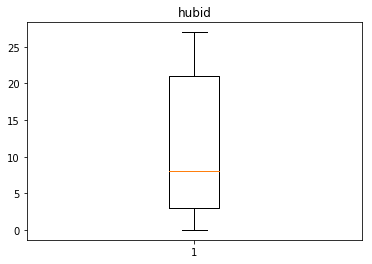

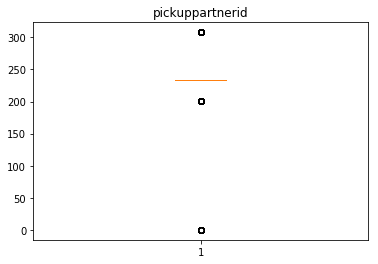

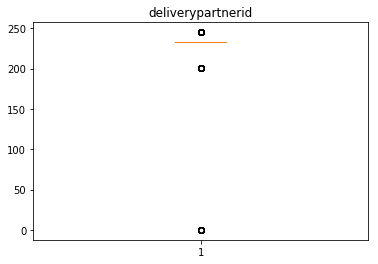

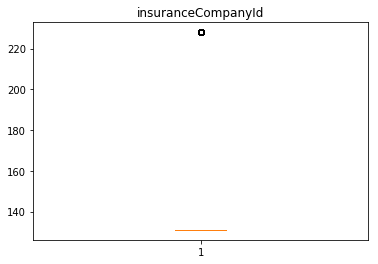

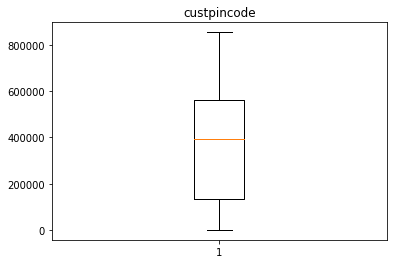

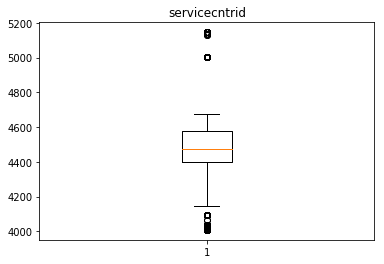

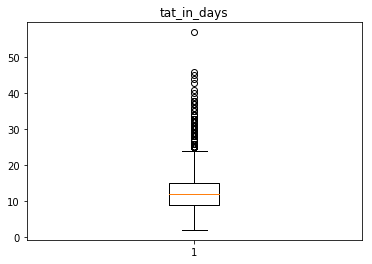

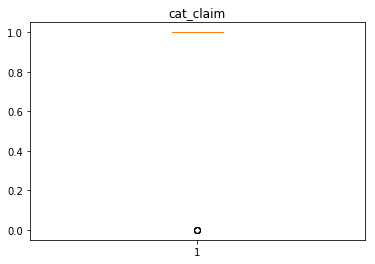

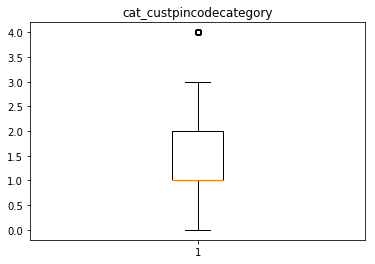

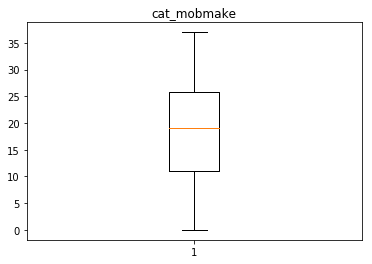

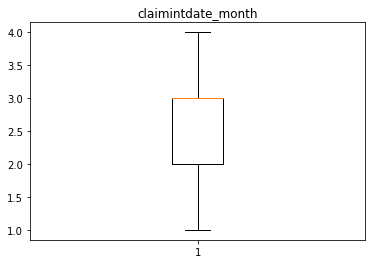

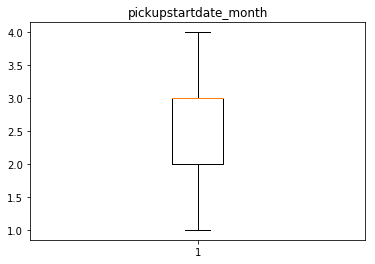

In [855]:
for i in range(len(cols)):
    plt.boxplot(new[cols[i]])
    plt.title(cols[i])
    plt.show()

In [865]:
new = new[(new['pickuppartnerid'] < 250) & (new['pickuppartnerid'] > 210)]
new = new[(new['deliverypartnerid'] > 150)]
new = new[(new['insuranceCompanyId'] < 200)]
new = new[new['cat_claim'] > 0.2]
new = new[new['cat_custpincodecategory'] < 3.5]
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4180 entries, 0 to 6248
Data columns (total 12 columns):
hubid                      4180 non-null int64
pickuppartnerid            4180 non-null int64
deliverypartnerid          4180 non-null int64
insuranceCompanyId         4180 non-null int64
custpincode                4180 non-null int64
servicecntrid              4180 non-null int64
tat_in_days                4180 non-null int64
cat_claim                  4180 non-null int64
cat_custpincodecategory    4180 non-null int64
cat_mobmake                4180 non-null int64
claimintdate_month         4180 non-null int64
pickupstartdate_month      4180 non-null int64
dtypes: int64(12)
memory usage: 424.5 KB


In [866]:
new.columns

Index(['hubid', 'pickuppartnerid', 'deliverypartnerid', 'insuranceCompanyId',
       'custpincode', 'servicecntrid', 'tat_in_days', 'cat_claim',
       'cat_custpincodecategory', 'cat_mobmake', 'claimintdate_month',
       'pickupstartdate_month'],
      dtype='object')

In [867]:
X_new = new.iloc[:,[0,1,2,3,4,5,7,8,9,10,11]].values
y_new = new.iloc[:,6].values

In [868]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3135, 11), (1045, 11), (3135,), (1045,))

In [869]:
regression_rmse(X_train, X_test, y_train, y_test)

LINEAR REGRESSION : 
  TEST SET ERROR :  4.427912788426541
  TRAINING SET ERROR :  4.633929958749142
POLYNOMIAL REGRESSION WITH DEGREE 2 : 
  TEST SET ERROR :  4.234812613769897
POLYNOMIAL REGRESSION WITH DEGREE 3 : 
  TEST SET ERROR :  4.346136351991047
1   DECISION TREE REGRESSION  :  4.598767801518628
  DECISION TREE TRAINING SET ERROR :  4.797219014573903
Cross Validation Accuracy: 0.04 (+/- 0.04)
2   DECISION TREE REGRESSION  :  4.453758844272245
  DECISION TREE TRAINING SET ERROR :  4.639239701998208
Cross Validation Accuracy: 0.10 (+/- 0.08)
3   DECISION TREE REGRESSION  :  4.252106553917694
  DECISION TREE TRAINING SET ERROR :  4.504786286068896
Cross Validation Accuracy: 0.15 (+/- 0.08)
4   DECISION TREE REGRESSION  :  4.211057058244301
  DECISION TREE TRAINING SET ERROR :  4.373724357449732
Cross Validation Accuracy: 0.16 (+/- 0.07)
5   DECISION TREE REGRESSION  :  4.123282898772526
  DECISION TREE TRAINING SET ERROR :  4.270766624046709
Cross Validation Accuracy: 0.16 (+/- 0

In [870]:
dt = DecisionTreeRegressor(random_state = 0, max_depth =4)
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
print(4, "  DECISION TREE REGRESSION  : ", rmse(y_pred4, y_test))
print("  DECISION TREE TRAINING SET ERROR : ", rmse(dt.predict(X_train), y_train))

4   DECISION TREE REGRESSION  :  4.211057058244301
  DECISION TREE TRAINING SET ERROR :  4.373724357449732


In [871]:
predictions_new = dt.predict(test_data)
predictions_new

array([11.20297556, 13.28975265, 14.73846154, ..., 15.65420561,
       11.20297556, 13.7672956 ])

In [872]:
df = pd.DataFrame(predictions_new)

In [873]:
df.to_csv("predictions_question2_new.csv", sep=",", index = False, header = False)